In [17]:
import pandas as pd                    # for data handling
import numpy as np                     # for numerical methods and data structures
import matplotlib.pyplot as plt        # for plotting
import seaborn as sns                  # advanced plotting
import os 

# Show all rows
pd.set_option('display.max_rows', None)

# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.4f}'.format)

### Load house price and rent data extracted from the Zillow Housing Data database. Property tax value extracted from Tax Foundation.

In [19]:
buy = pd.read_csv('Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
#fill NaN values 
buy = buy.fillna(method='ffill')
rent = pd.read_csv('Metro_zori_uc_sfrcondomfr_sm_month.csv')
#Select top 50 cities
buy1 = buy.loc[1:50]

/var/folders/92/qvks6t0j2dl9bjv_qqvnn6mc0000gn/T/ipykernel_76017/3298584674.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  buy = buy.fillna(method='ffill')


In [20]:
buy1

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,11/30/00,12/31/00,1/31/01,2/28/01,3/31/01,4/30/01,5/31/01,6/30/01,7/31/01,8/31/01,9/30/01,10/31/01,11/30/01,12/31/01,1/31/02,2/28/02,3/31/02,4/30/02,5/31/02,6/30/02,7/31/02,8/31/02,9/30/02,10/31/02,11/30/02,12/31/02,1/31/03,2/28/03,3/31/03,4/30/03,5/31/03,6/30/03,7/31/03,8/31/03,9/30/03,10/31/03,11/30/03,12/31/03,1/31/04,2/29/04,3/31/04,4/30/04,5/31/04,6/30/04,7/31/04,8/31/04,9/30/04,10/31/04,11/30/04,12/31/04,1/31/05,2/28/05,3/31/05,4/30/05,5/31/05,6/30/05,7/31/05,8/31/05,9/30/05,10/31/05,11/30/05,12/31/05,1/31/06,2/28/06,3/31/06,4/30/06,5/31/06,6/30/06,7/31/06,8/31/06,9/30/06,10/31/06,11/30/06,12/31/06,1/31/07,2/28/07,3/31/07,4/30/07,5/31/07,6/30/07,7/31/07,8/31/07,9/30/07,10/31/07,11/30/07,12/31/07,1/31/08,2/29/08,3/31/08,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,12/31/08,1/31/09,2/28/09,3/31/09,4/30/09,5/31/09,6/30/09,7/31/09,8/31/09,9/30/09,10/31/09,11/30/09,12/31/09,1/31/10,2/28/10,3/31/10,4/30/10,5/31/10,6/30/10,7/31/10,8/31/10,9/30/10,10/31/10,11/30/10,12/31/10,1/31/11,2/28/11,3/31/11,4/30/11,5/31/11,6/30/11,7/31/11,8/31/11,9/30/11,10/31/11,11/30/11,12/31/11,1/31/12,2/29/12,3/31/12,4/30/12,5/31/12,6/30/12,7/31/12,8/31/12,9/30/12,10/31/12,11/30/12,12/31/12,1/31/13,2/28/13,3/31/13,4/30/13,5/31/13,6/30/13,7/31/13,8/31/13,9/30/13,10/31/13,11/30/13,12/31/13,1/31/14,2/28/14,3/31/14,4/30/14,5/31/14,6/30/14,7/31/14,8/31/14,9/30/14,10/31/14,11/30/14,12/31/14,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,6/30/15,7/31/15,8/31/15,9/30/15,10/31/15,11/30/15,12/31/15,1/31/16,2/29/16,3/31/16,4/30/16,5/31/16,6/30/16,7/31/16,8/31/16,9/30/16,10/31/16,11/30/16,12/31/16,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,6/30/18,7/31/18,8/31/18,9/30/18,10/31/18,11/30/18,12/31/18,1/31/19,2/28/19,3/31/19,4/30/19,5/31/19,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20,12/31/20,1/31/21,2/28/21,3/31/21,4/30/21,5/31/21,6/30/21,7/31/21,8/31/21,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23,3/31/23,4/30/23,5/31/23,6/30/23,7/31/23,8/31/23,9/30/23,10/31/23,11/30/23,12/31/23,1/31/24,2/29/24,3/31/24,4/30/24,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24,11/30/24,12/31/24,1/31/25,2/28/25,3/31/25,Property Tax
1,394913,1,"New York, NY",msa,NY,"217,199.0405","218,122.0138","219,053.5356","220,941.1592","222,895.8587","225,062.9314","227,430.5122","229,952.1153","232,532.6973","235,106.5960","237,602.0229","239,958.5659","242,204.0581","244,506.6066","246,741.1709","249,000.6593","251,221.2899","253,612.8192","256,050.0758","258,667.5020","261,368.0287","264,276.7534","267,078.8560","269,774.2696","272,445.1414","275,005.2966","277,439.1841","279,751.7675","282,161.1838","284,888.5153","287,905.4042","291,543.7259","295,498.9088","299,539.5135","303,282.0170","306,954.5095","310,611.4287","314,276.0258","318,081.5352","321,714.8916","325,389.3711","329,021.8929","332,828.0132","336,616.0005","340,174.5365","343,501.3704","346,606.4563","349,585.2726","352,760.2933","355,931.6402","359,212.8090","362,417.2952","366,085.1890","370,135.5219","374,660.2571","379,348.6213","384,210.8133","389,088.5486","393,773.4513","398,124.7408","402,208.2309","406,175.2043","410,206.4252","414,796.3335","419,771.8963","424,811.5346","429,591.5791","434,314.1609","439,086.3815","443,957.9405","448,453.7476","452,790.6441","456,651.0526","460,492.6181","463,772.0894","466,724.9610","469,276.4008","471,658.6257","473,400.7925","474,256.2412","474,174.8250","473,262.9570","471,862.7371","470,212.7790","468,636.9731","467,430.0064","467,160.5439","466,983.5653","466,813.7269","465,684.5188","464,098.9793","462,381.0004","460,538.3489","459,167.

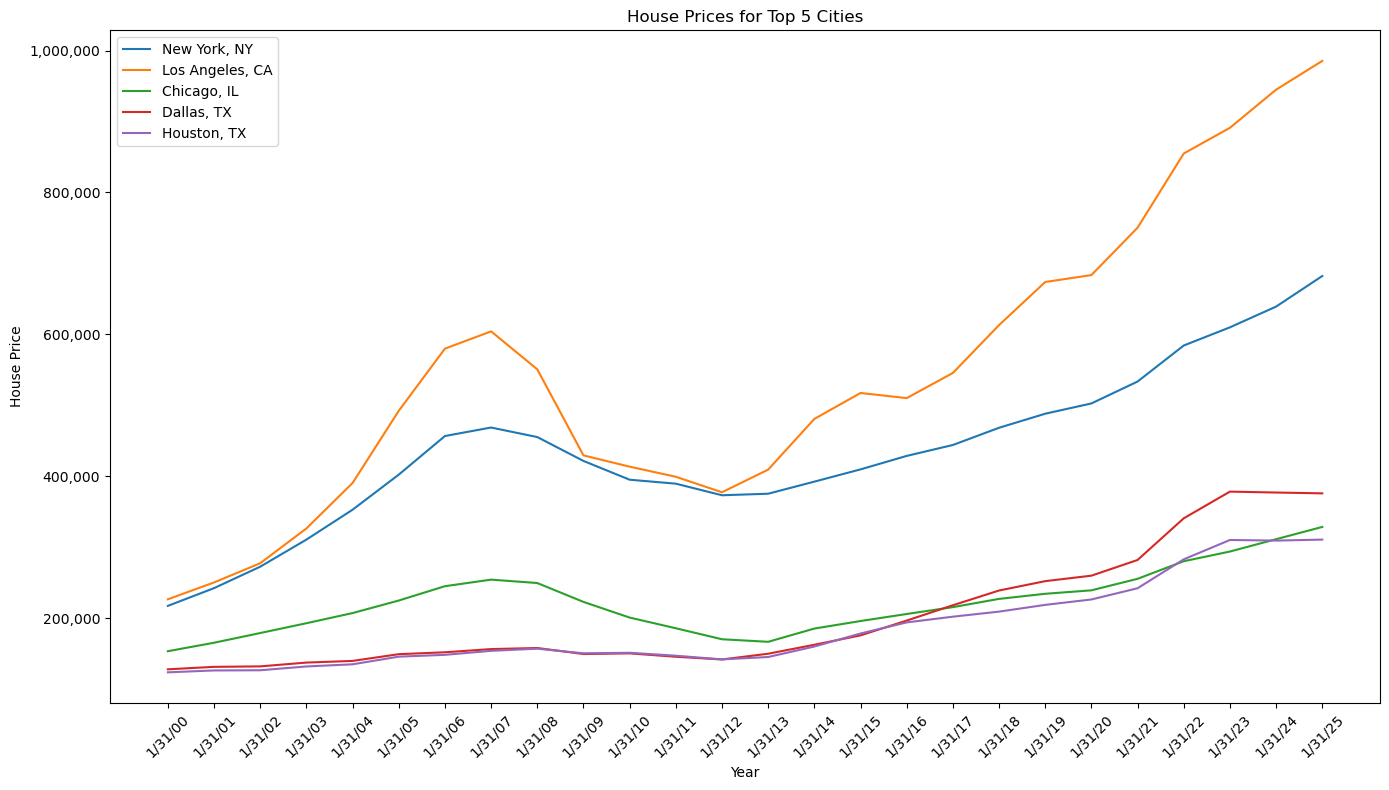

In [21]:
import matplotlib.ticker as ticker

# Filter only the columns that end in '1/31' to get January data
jan_cols = [col for col in buy1.columns if '1/31/' in col]

# Sort the columns to ensure they are in chronological order
jan_cols_sorted = sorted(jan_cols, key=lambda x: pd.to_datetime(x, format='%m/%d/%y'))

# Slice top 10 cities 
buy1_top5 = buy1.head(5)

# Plot line graph
plt.figure(figsize=(14, 8))
for idx, row in buy1_top5.iterrows():
    city_name = row['RegionName']
    prices = row[jan_cols_sorted].values.astype(float)
    plt.plot(jan_cols_sorted, prices, label=city_name)

plt.xlabel('Year')
plt.ylabel('House Price')
plt.title('House Prices for Top 5 Cities')
plt.xticks(rotation=45)
plt.legend()
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Add comma formatting
plt.tight_layout()
plt.show()


In [22]:
#calculate house appreciation using compounded annual growth rate
buy_fin = buy1.drop(columns=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName", "Property Tax"])
#number of years
n_years = buy_fin.shape[1]/12
#Implement equation 
buy_fin['CAGR of House Value'] = (buy_fin['3/31/25']/buy_fin['1/31/00']) ** (1/n_years) - 1

In [23]:
buy2 = buy1[['SizeRank','RegionName','StateName','3/31/25','Property Tax']]
buy_filtered = buy2.rename(columns={'3/31/25': 'Home Value (March 2025)'})
buy_filtered['CAGR of House Value'] = buy_fin['CAGR of House Value'] 
buy_filtered

,SizeRank,RegionName,StateName,Home Value (March 2025),Property Tax,CAGR of House Value
1,1,"New York, NY",NY,"685,225.1556",0.0160,0.0466
2,2,"Los Angeles, CA",CA,"978,226.0160",0.0071,0.0597
3,3,"Chicago, IL",IL,"330,682.6689",0.0207,0.0309
4,4,"Dallas, TX",TX,"373,541.4319",0.0158,0.0434
5,5,"Houston, TX",TX,"309,841.4816",0.0158,0.0371
6,6,"Washington, DC",VA,"581,339.8118",0.0058,0.0470
7,7,"Philadelphia, PA",PA,"369,486.3087",0.0135,0.0451
8,8,"Miami, FL",FL,"485,399.7297",0.0079,0.0593
9,9,"Atlanta, GA",GA,"381,340.4026",0.0081,0.0386
10,10,"Boston, MA",MA,"708,240.4918",0.0111,0.0480


In [24]:
rent1 = rent[1:51]

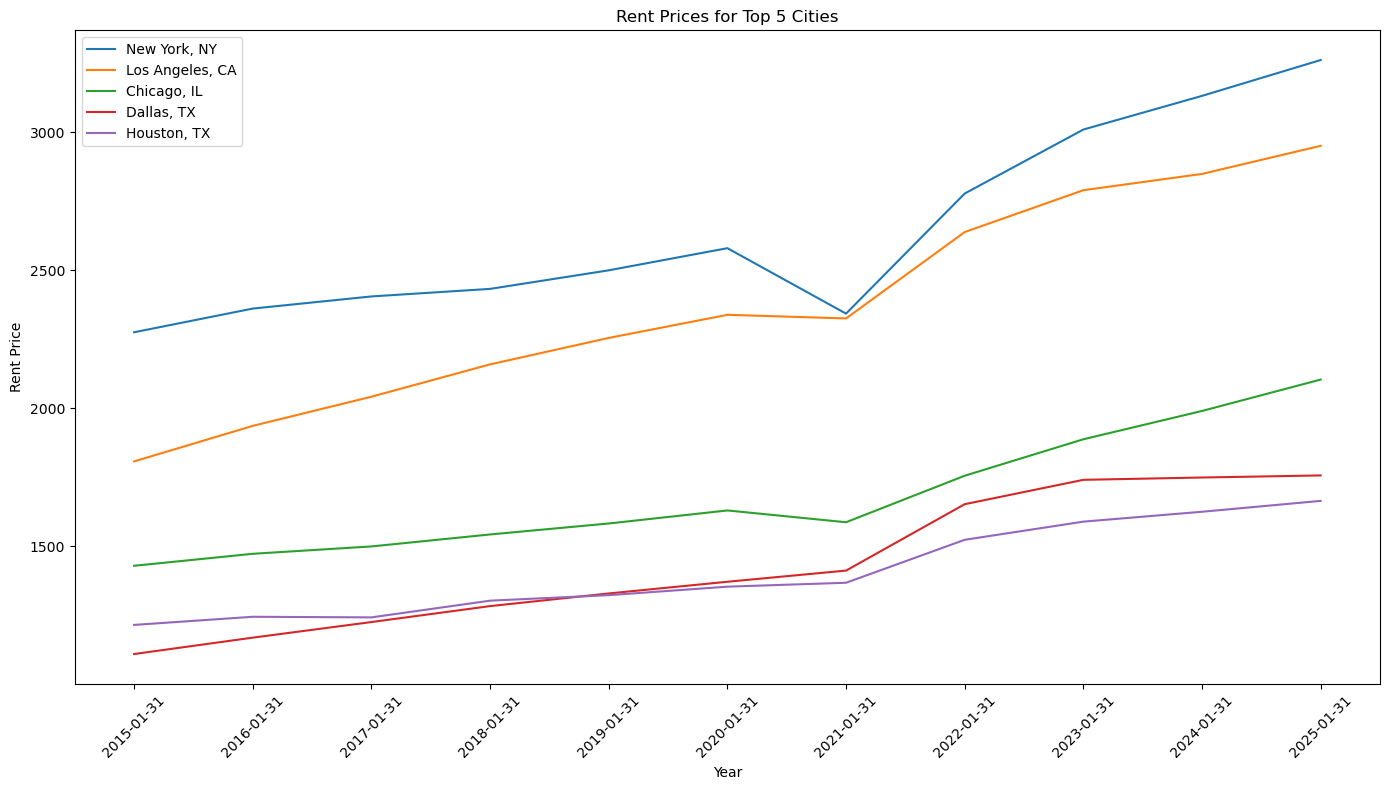

In [25]:
# Filter only the columns that are end-of-January dates
jan_cols = [col for col in rent1.columns if col.endswith('-01-31')]

# Sort the columns to ensure chronological order
jan_cols_sorted = sorted(jan_cols, key=lambda x: pd.to_datetime(x))

# Slice top 10 cities (assuming they are already ordered)
rent1_top5 = rent1.head(5)

# Plot line graph
plt.figure(figsize=(14, 8))
for idx, row in rent1_top5.iterrows():
    city_name = row['RegionName']
    rents = row[jan_cols_sorted].values.astype(float)
    plt.plot(jan_cols_sorted, rents, label=city_name)

plt.xlabel('Year')
plt.ylabel('Rent Price')
plt.title('Rent Prices for Top 5 Cities')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
#Caculate annual rental rate increase by CAGR
rent_fin = rent1.drop(columns=["RegionID", "SizeRank", "RegionName", "RegionType", "StateName"])
rent_years = rent_fin.shape[1]/12
rent_fin['CAGR of Rent'] = (rent_fin['2025-03-31']/rent_fin['2015-01-31']) ** (1/rent_years) - 1

In [27]:
rent2 = rent1[['SizeRank','RegionName','StateName','2025-03-31']]
rent_filtered = rent2.rename(columns={'2025-03-31': 'Rent (March 2025)'})
rent_filtered['CAGR of Rent'] = rent_fin['CAGR of Rent']

In [28]:
#Summarize into one dataframe 
rent_filtered['Home Value (March 2025)'] = buy_filtered['Home Value (March 2025)']
summarized = rent_filtered
summarized['CAGR of House Value'] = buy_filtered['CAGR of House Value']
summarized['Property Tax'] = buy_filtered['Property Tax']
summarized

,SizeRank,RegionName,StateName,Rent (March 2025),CAGR of Rent,Home Value (March 2025),CAGR of House Value,Property Tax
1,1,"New York, NY",NY,"3,313.3319",0.0374,"685,225.1556",0.0466,0.0160
2,2,"Los Angeles, CA",CA,"2,997.2691",0.0506,"978,226.0160",0.0597,0.0071
3,3,"Chicago, IL",IL,"2,138.6267",0.0401,"330,682.6689",0.0309,0.0207
4,4,"Dallas, TX",TX,"1,773.3139",0.0468,"373,541.4319",0.0434,0.0158
5,5,"Houston, TX",TX,"1,678.7453",0.0321,"309,841.4816",0.0371,0.0158
6,6,"Washington, DC",VA,"2,395.3578",0.0341,"581,339.8118",0.0470,0.0058
7,7,"Philadelphia, PA",PA,"1,897.6505",0.0426,"369,486.3087",0.0451,0.0135
8,8,"Miami, FL",FL,"2,717.6720",0.0610,"485,399.7297",0.0593,0.0079
9,9,"Atlanta, GA",GA,"1,902.6585",0.0615,"381,340.4026",0.0386,0.0081
10,10,"Boston, MA",MA,"3,144.7676",0.0424,"708,240.4918",0.0480,0.0111


### Using some simplifying assumptions, caculated the NPV of renting and buying over 15 and 30 years period.

In [30]:
#Simplifying Assumptions:

#Buyer
down_payment = 0.20 # 20% of house value as down payment 
mortgage_thirty_year_fixed_rate = 0.0683 # 30 year mean fixed mortgage rate as extracted from the FRED on 4/17/25
mortgage_fifteen_year_fixed_rate = 0.0603 # 15 year mean fixed mortgage rate as extracted from the FRED on 4/22/25
home_insurance_and_maintenance_cost = 0.015 # about 1.5% across the country
transaction_cost_at_purchase = 0.03 #From Zillow
transaction_cost_at_sale = 0.08 #From Zillow 
discount_rate = 0.05 # Assumed annual opportunity cost 

#Renter
rental_insurance = 0.01 # 1% of annual rent from Zillow

In [31]:
# Function to calculate NPV of rent for each city
def calculate_npv_rent(rent_monthly, rental_inflation_rate):
    
    # Step 1: Calculate initial annual rent
    rent_annual = rent_monthly * 12
    # Step 2: Calculate NPV of rent
    npv_rent = rent_annual * (1-((1+rental_inflation_rate)/(1+discount_rate))**years)/(discount_rate-rental_inflation_rate)
    # Step 3: Calculate NPV of rental insurance 
    npv_insurance = (rent_annual*rental_insurance) * (1-((1+rental_inflation_rate)/(1+discount_rate))**years)/(discount_rate-rental_inflation_rate)
    # Final NPV of Renting
    npv_total_rent = -(npv_rent + npv_insurance)

    return npv_total_rent

# Apply the NPV calculation to each row (city) for year = 15 and year = 30
for yr in [15, 30]:
    years = yr  # set globally for use in the function
    summarized[f'NPV of Rent {yr}yr'] = summarized.apply(
        lambda row: calculate_npv_rent(row['Rent (March 2025)'], row['CAGR of Rent']), axis=1
    )


In [32]:
def calculate_npv_buy(home_price, home_appreciation_rate, property_tax):
    
    # Step 1: Initial Costs
    initial_down_payment = down_payment * home_price
    transaction_cost_buy = transaction_cost_at_purchase * home_price
    loan_amount = (1 - down_payment) * home_price

    # Step 2: Annual Mortgage Payment using annuity formula
    r = mortgage_thirty_year_fixed_rate if years == 30 else mortgage_fifteen_year_fixed_rate
    n = years
    annual_mortgage_payment = loan_amount * (r * (1 + r)**n) / ((1 + r)**n - 1)

    # Step 3: Annual Costs
    annual_property_tax = property_tax * home_price
    annual_insurance_maintenance = home_insurance_and_maintenance_cost * home_price
    annual_cost = annual_mortgage_payment + annual_property_tax + annual_insurance_maintenance

    # Step 4: NPV of Annual Costs using the annuity formula
    npv_annual_costs = annual_cost * (1 - (1 + discount_rate) ** -years) / discount_rate

    # Step 5: Terminal Value: Sale proceeds
    future_home_value = home_price * (1 + home_appreciation_rate) ** years
    transaction_cost_sell = transaction_cost_at_sale * future_home_value

    # Remaining mortgage balance after n years is zero (fully amortized)
    net_sale_proceeds = future_home_value - transaction_cost_sell

    # Step 6: Discounted Sale Value
    present_value_of_sale = net_sale_proceeds / ((1 + discount_rate) ** years)

    # Step 7: Total NPV of Buying
    npv_total_buy = -initial_down_payment - transaction_cost_buy - npv_annual_costs + present_value_of_sale

    return npv_total_buy

# Apply the NPV calculation to each row (city)
for yr in [15, 30]:
    years = yr  # global variable used in the function
    summarized[f'NPV of Buying {yr}yr'] = summarized.apply(
        lambda row: calculate_npv_buy(
            row['Home Value (March 2025)'],
            row['CAGR of House Value'],
            row['Property Tax']
        ),axis=1)

### Add a Buy or Rent Comparison between 15 and 30 years period

In [34]:
# Add column for 15-year comparison: 'Buy' if buying is better (less negative NPV), 'Rent' if renting is better
summarized['Better Option 15yr'] = summarized.apply(
    lambda row: 'Buy' if row['NPV of Buying 15yr'] > row['NPV of Rent 15yr'] else 'Rent', axis=1
)

# Add column for 30-year comparison: 'Buy' if buying is better (less negative NPV), 'Rent' if renting is better
summarized['Better Option 30yr'] = summarized.apply(
    lambda row: 'Buy' if row['NPV of Buying 30yr'] > row['NPV of Rent 30yr'] else 'Rent', axis=1
)

summarized



,SizeRank,RegionName,StateName,Rent (March 2025),CAGR of Rent,Home Value (March 2025),CAGR of House Value,Property Tax,NPV of Rent 15yr,NPV of Rent 30yr,NPV of Buying 15yr,NPV of Buying 30yr,Better Option 15yr,Better Option 30yr
1,1,"New York, NY",NY,"3,313.3319",0.0374,"685,225.1556",0.0466,0.0160,"-527,790.4185","-967,940.0661","-365,014.2679","-580,479.7704",Buy,Buy
2,2,"Los Angeles, CA",CA,"2,997.2691",0.0506,"978,226.0160",0.0597,0.0071,"-521,036.9776","-1,046,558.4641","-254,961.2886","-325,915.2878",Buy,Buy
3,3,"Chicago, IL",IL,"2,138.6267",0.0401,"330,682.6689",0.0309,0.0207,"-346,855.8822","-647,834.3330","-250,808.9851","-404,183.9140",Buy,Buy
4,4,"Dallas, TX",TX,"1,773.3139",0.0468,"373,541.4319",0.0434,0.0158,"-300,616.5934","-587,871.5995","-212,653.4146","-342,187.1356",Buy,Buy
5,5,"Houston, TX",TX,"1,678.7453",0.0321,"309,841.4816",0.0371,0.0158,"-258,342.0522","-457,828.8714","-198,926.8015","-323,062.6496",Buy,Buy
6,6,"Washington, DC",VA,"2,395.3578",0.0341,"581,339.8118",0.0470,0.0058,"-373,529.0158","-670,632.7545","-245,091.1540","-395,523.5658",Buy,Buy
7,7,"Philadelphia, PA",PA,"1,897.6505",0.0426,"369,486.3087",0.0451,0.0135,"-312,745.7957","-593,826.9018","-194,092.0032","-311,722.1316",Buy,Buy
8,8,"Miami, FL",FL,"2,717.6720",0.0610,"485,399.7297",0.0593,0.0079,"-506,529.0248","-1,098,424.9155","-132,962.9335","-173,227.9628",Buy,Buy
9,9,"Atlanta, GA",GA,"1,902.6585",0.0615,"381,340.4026",0.0386,0.0081,"-355,925.6466","-775,023.9174","-207,970.1298","-341,752.2574",Buy,Buy
10,10,"Boston, MA",MA,"3,144.7676",0.0424,"708,240.4918",0.0480,0.0111,"-517,698.6182","-981,843.5420","-328,580.3393","-522,256.5139",Buy,Buy


### This bar chart shows the NPV for the 10 largest cities by population.

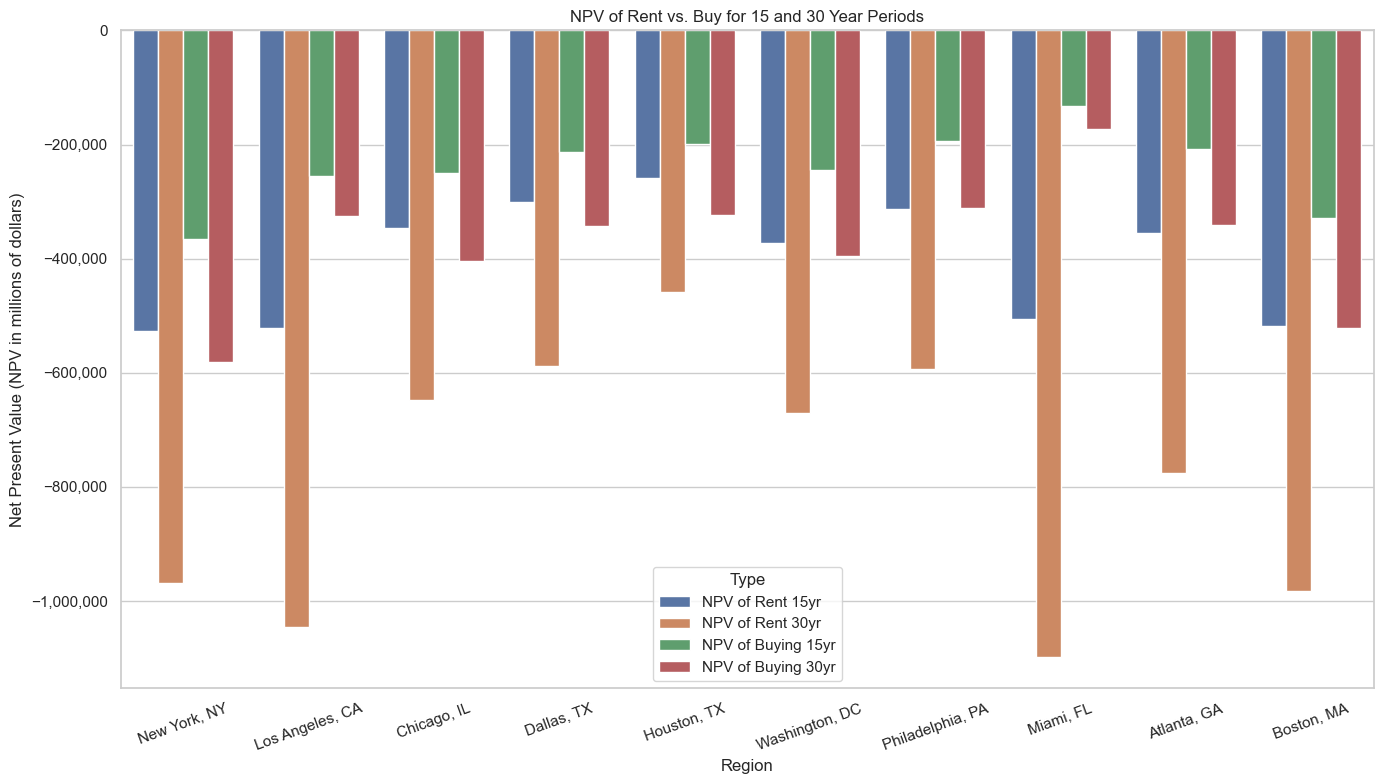

In [51]:
# Set the figure size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

df_first_10 = summarized.head(10)

# Melt the filtered DataFrame for easier plotting with seaborn
df_melted = df_first_10.melt(id_vars=['RegionName'], 
                             value_vars=['NPV of Rent 15yr', 'NPV of Rent 30yr', 'NPV of Buying 15yr', 'NPV of Buying 30yr'],
                             var_name='Type', value_name='NPV')
# Create the bar plot
sns.barplot(x='RegionName', y='NPV', hue='Type', data=df_melted)

# Rotate x-axis labels for readability
plt.xticks(rotation=20)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Net Present Value (NPV in millions of dollars)')
plt.title('NPV of Rent vs. Buy for 15 and 30 Year Periods')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Add comma formatting

# Show the plot
plt.tight_layout()
plt.show()